In [ ]:
!pip install gdown
import gdown

In [ ]:
file_id = '1domPS8-Bo3B8Ei-4xGIr2Vi_0a0cHBec'
gdown.download(f'https://drive.google.com/uc?id={file_id}', 'train.csv', quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1domPS8-Bo3B8Ei-4xGIr2Vi_0a0cHBec
From (redirected): https://drive.google.com/uc?id=1domPS8-Bo3B8Ei-4xGIr2Vi_0a0cHBec&confirm=t&uuid=fe53b7ef-6632-4911-bd23-c256c2966061
To: /content/train.csv
100%|██████████| 201M/201M [00:04<00:00, 40.7MB/s]


'train.csv'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

df = pd.read_csv('train.csv')
print(df.head())

          id  vendor_id      pickup_datetime     dropoff_datetime  \
0  id2875421          2  2016-03-14 17:24:55  2016-03-14 17:32:30   
1  id2377394          1  2016-06-12 00:43:35  2016-06-12 00:54:38   
2  id3858529          2  2016-01-19 11:35:24  2016-01-19 12:10:48   
3  id3504673          2  2016-04-06 19:32:31  2016-04-06 19:39:40   
4  id2181028          2  2016-03-26 13:30:55  2016-03-26 13:38:10   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   

   dropoff_latitude store_and_fwd_flag  trip_duration  
0         40.765602                  N            455  
1         40.731

In [ ]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['pickup_hour'] = df['pickup_datetime'].dt.floor('H')

<ipython-input-4-59304179fca9>:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['pickup_hour'] = df['pickup_datetime'].dt.floor('H')


In [ ]:
hourly_data = df.groupby('pickup_hour').size().reset_index(name='trip_count')

In [ ]:
hourly_data['hour'] = hourly_data['pickup_hour'].dt.hour
hourly_data['day'] = hourly_data['pickup_hour'].dt.day
hourly_data['weekday'] = hourly_data['pickup_hour'].dt.weekday
hourly_data['month'] = hourly_data['pickup_hour'].dt.month

In [ ]:
for lag in range(1, 4):
    hourly_data[f'lag_{lag}'] = hourly_data['trip_count'].shift(lag)


hourly_data.dropna(inplace=True)

In [ ]:
features = ['hour', 'day', 'weekday', 'month', 'lag_1', 'lag_2', 'lag_3']
X = hourly_data[features]
y = hourly_data['trip_count']

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=False)

In [ ]:
model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=300,
    learning_rate=0.1,
    max_depth=6,
    random_state=42
)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
val_preds = model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, val_preds))
print(f'Validation RMSE: {rmse:.2f}')

Validation RMSE: 32.86


In [ ]:
hourly_data['trip_count'].mean()

np.float64(334.4878328741965)

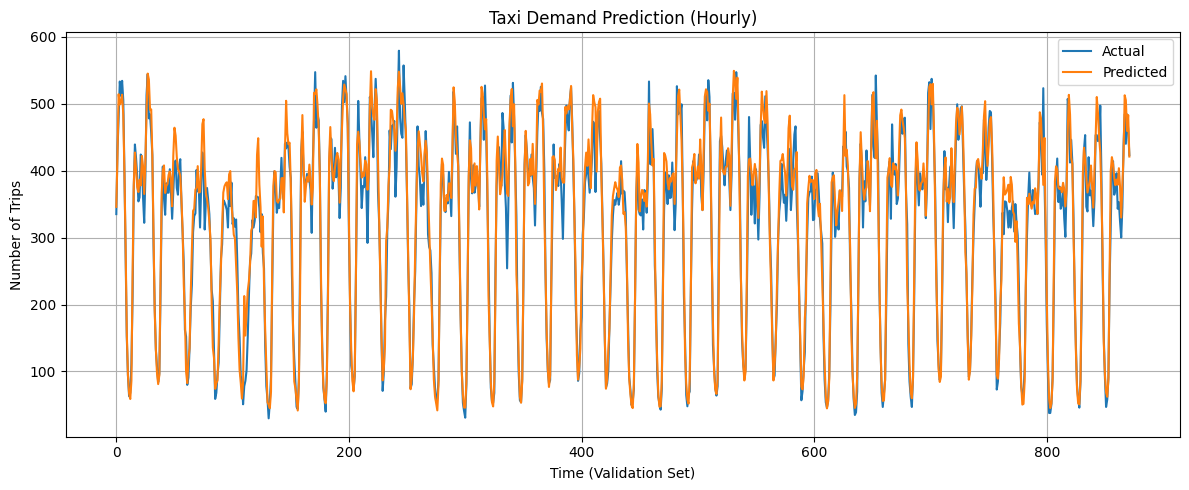

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(y_val.values, label='Actual')
plt.plot(val_preds, label='Predicted')
plt.title('Taxi Demand Prediction (Hourly)')
plt.xlabel('Time (Validation Set)')
plt.ylabel('Number of Trips')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Test**

In [ ]:
file_id_test = '1e7haVGQHFnr_htIQfTS8X5qak-46Pii6'
gdown.download(f'https://drive.google.com/uc?id={file_id_test}', 'test.csv', quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1e7haVGQHFnr_htIQfTS8X5qak-46Pii6
To: /content/test.csv
100%|██████████| 70.8M/70.8M [00:00<00:00, 85.1MB/s]


'test.csv'

In [ ]:
test_df = pd.read_csv('test.csv')
test_df['pickup_datetime'] = pd.to_datetime(test_df['pickup_datetime'])
test_df['pickup_hour'] = test_df['pickup_datetime'].dt.floor('H')

<ipython-input-15-457f62af3e08>:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  test_df['pickup_hour'] = test_df['pickup_datetime'].dt.floor('H')


In [ ]:
test_hourly = test_df.groupby('pickup_hour').size().reset_index(name='trip_count')

In [ ]:
test_hourly['hour'] = test_hourly['pickup_hour'].dt.hour
test_hourly['day'] = test_hourly['pickup_hour'].dt.day
test_hourly['weekday'] = test_hourly['pickup_hour'].dt.weekday
test_hourly['month'] = test_hourly['pickup_hour'].dt.month

In [ ]:
full_data = pd.concat([hourly_data[['pickup_hour', 'trip_count']], test_hourly[['pickup_hour', 'trip_count']]])
full_data['pickup_hour'] = pd.to_datetime(full_data['pickup_hour'])
full_data = full_data.set_index('pickup_hour').resample('H').sum().fillna(0).reset_index()

<ipython-input-19-08af29291bdc>:4: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  full_data = full_data.set_index('pickup_hour').resample('H').sum().fillna(0).reset_index() # Resample with sum aggregation and fill NaN with 0


In [ ]:
for lag in range(1, 4):
    full_data[f'lag_{lag}'] = full_data['trip_count'].shift(lag)

In [ ]:
full_data['hour'] = full_data['pickup_hour'].dt.hour
full_data['day'] = full_data['pickup_hour'].dt.day
full_data['weekday'] = full_data['pickup_hour'].dt.weekday
full_data['month'] = full_data['pickup_hour'].dt.month
full_data.dropna(inplace=True)

In [ ]:
test_features = full_data.tail(len(test_hourly))[features]

In [ ]:
test_preds = model.predict(test_features)

In [ ]:
test_hourly['predicted_demand'] = test_preds
print(test_hourly[['pickup_hour', 'predicted_demand']].head())

          pickup_hour  predicted_demand
0 2016-01-01 00:00:00        385.742889
1 2016-01-01 01:00:00        409.949615
2 2016-01-01 02:00:00        495.290802
3 2016-01-01 03:00:00        442.221130
4 2016-01-01 04:00:00        372.009857


**Now, Prediction for next 24 hours (Future Forecasting)**

In [ ]:
last_time = hourly_data['pickup_hour'].max()
future_hours = pd.date_range(start=last_time + pd.Timedelta(hours=1), periods=24, freq='H')

<ipython-input-25-c773b2166327>:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  future_hours = pd.date_range(start=last_time + pd.Timedelta(hours=1), periods=24, freq='H')


In [ ]:
future_df = pd.DataFrame({'pickup_hour': future_hours})

In [ ]:
future_df['hour'] = future_df['pickup_hour'].dt.hour
future_df['day'] = future_df['pickup_hour'].dt.day
future_df['weekday'] = future_df['pickup_hour'].dt.weekday
future_df['month'] = future_df['pickup_hour'].dt.month

In [ ]:
latest = hourly_data.copy()
latest = latest.set_index('pickup_hour').asfreq('H').fillna(0)
last_known = latest['trip_count'][-3:].values.tolist()

future_preds = []

for i in range(24):
    input_data = {
        'hour': future_df.loc[i, 'hour'],
        'day': future_df.loc[i, 'day'],
        'weekday': future_df.loc[i, 'weekday'],
        'month': future_df.loc[i, 'month'],
        'lag_1': last_known[-1],
        'lag_2': last_known[-2],
        'lag_3': last_known[-3],
    }
    X_future = pd.DataFrame([input_data])
    pred = model.predict(X_future)[0]
    future_preds.append(pred)
    last_known.append(pred)

<ipython-input-29-020cb3d91cc4>:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  latest = latest.set_index('pickup_hour').asfreq('H').fillna(0)


In [ ]:
future_df['predicted_demand'] = future_preds

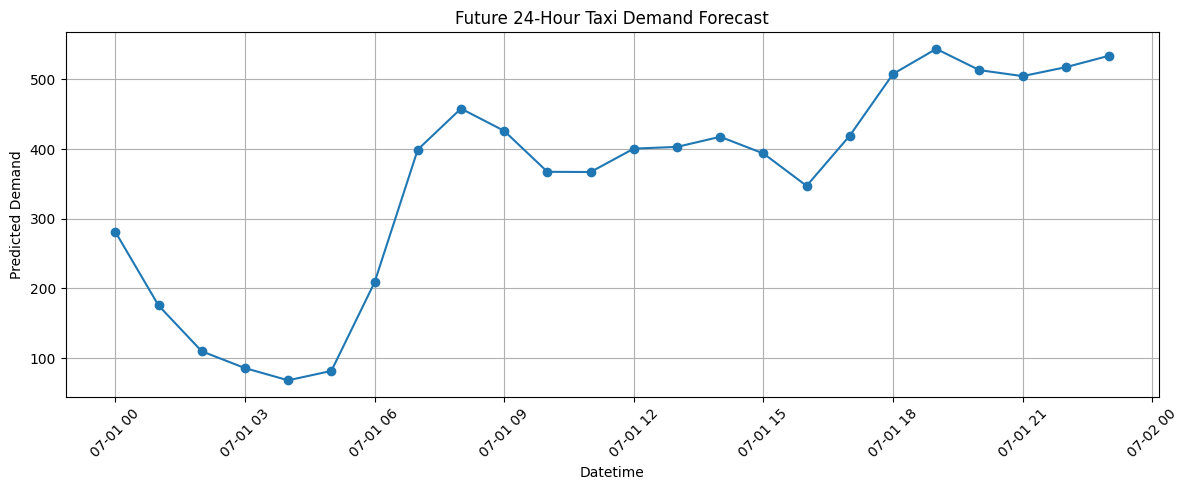

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(future_df['pickup_hour'], future_df['predicted_demand'], marker='o')
plt.title('Future 24-Hour Taxi Demand Forecast')
plt.xlabel('Datetime')
plt.ylabel('Predicted Demand')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
future_df.head()

,pickup_hour,hour,day,weekday,month,predicted_demand
0,2016-07-01 00:00:00,0,1,4,7,281.165253
1,2016-07-01 01:00:00,1,1,4,7,175.437012
2,2016-07-01 02:00:00,2,1,4,7,109.716942
3,2016-07-01 03:00:00,3,1,4,7,85.608582
4,2016-07-01 04:00:00,4,1,4,7,68.046715
